# Data Cleaning

In this notebook I will be looking at the dataset for invalid/missing entries as well as other mistakes in the dataset and cleaning it up to prepare for machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
dataset_size=df.shape
print(dataset_size)

(76020, 371)


In [4]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [5]:
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


(None,
    ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
 0   1     2     23                 0.0                      0.0   
 1   3     2     34                 0.0                      0.0   
 2   4     2     23                 0.0                      0.0   
 3   8     2     37                 0.0                    195.0   
 4  10     2     39                 0.0                      0.0   
 
    imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
 0                      0.0                      0.0                      0.0   
 1                      0.0                      0.0                      0.0   
 2                      0.0                      0.0                      0.0   
 3                    195.0                      0.0                      0.0   
 4                      0.0                      0.0                      0.0   
 
    imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
 0                      0.0       

In [6]:
data_types = df.dtypes

print("Data Types and Additional Information:")
for column in df.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {df[column].nunique()}")
    print(f" - Sample Values: {df[column].dropna().unique()[:5]}")  
    print()

Data Types and Additional Information:
Column: ID
 - Data Type: int64
 - Number of Unique Values: 76020
 - Sample Values: [ 1  3  4  8 10]

Column: var3
 - Data Type: int64
 - Number of Unique Values: 208
 - Sample Values: [  2 229 178   0   8]

Column: var15
 - Data Type: int64
 - Number of Unique Values: 100
 - Sample Values: [23 34 37 39 27]

Column: imp_ent_var16_ult1
 - Data Type: float64
 - Number of Unique Values: 596
 - Sample Values: [   0.  600.  525. 3000.   24.]

Column: imp_op_var39_comer_ult1
 - Data Type: float64
 - Number of Unique Values: 7551
 - Sample Values: [   0.    195.   1086.48   55.2   117.75]

Column: imp_op_var39_comer_ult3
 - Data Type: float64
 - Number of Unique Values: 9099
 - Sample Values: [   0.    195.   1952.91   70.95  122.25]

Column: imp_op_var40_comer_ult1
 - Data Type: float64
 - Number of Unique Values: 293
 - Sample Values: [  0.   247.56 828.18 746.1  383.85]

Column: imp_op_var40_comer_ult3
 - Data Type: float64
 - Number of Unique Values: 

Right off the bat it looks like there is a lot of information given in the dataset. There are 76020 entries and 371 columns. 111 of the columns are float type data while the other 260 columns are integer type data. 

The important column is the "TARGET" column where it identifies whether or not the customer was satisfied with their shopping experience. 1 identifies an unsatisfied customer while 0 idnetifies a satsified customer.  

The ID column gives each customer entry a unique ID.  

The rest of the columns are variables that give explanation as to why a customer was or was not satisfied. Most of the values for these columns seem to be 0 or 1 which indicates that these columns are using binary classification. Meaning that for the columns that have 0 or 1, if there is a 1 it means that the customer has most likely experience that variable which contributes to their overall satisfaction. This also indicates that one hot encoding may have already been used. 

In [7]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


There are some instances of an arbitrary number being used (-9999999) to show that there is a missing or invalid value.

In [8]:
invalid_entries = df[df.select_dtypes(include=['number']) == -999999].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 ID                           0
var3                       116
var15                        0
imp_ent_var16_ult1           0
imp_op_var39_comer_ult1      0
                          ... 
saldo_medio_var44_hace3      0
saldo_medio_var44_ult1       0
saldo_medio_var44_ult3       0
var38                        0
TARGET                       0
Length: 371, dtype: int64


In [9]:
missing_entries=df.isnull()
missing_entries

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
np.any(df.isnull())

False

It seems that there are no missing entries but there are 116 invalid entries in var3 that have the -999999 to indicate that the information was originally missing or wrong.

In [11]:
df_drop_id = df.drop(columns=['ID'])
duplicates = df_drop_id.duplicated().sum()
print("Number of Duplicate Records:", duplicates)

Number of Duplicate Records: 4807


The ID of the rows is what makes them unique and if we drop it, then we are able to see all the duplicates. In this case, it seems that about 5000 out of 76000 is a duplicate which is about 6% of the whole data. Since it is such a small percentage of the overall data, we could drop it.

## Visualization

(array([73012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

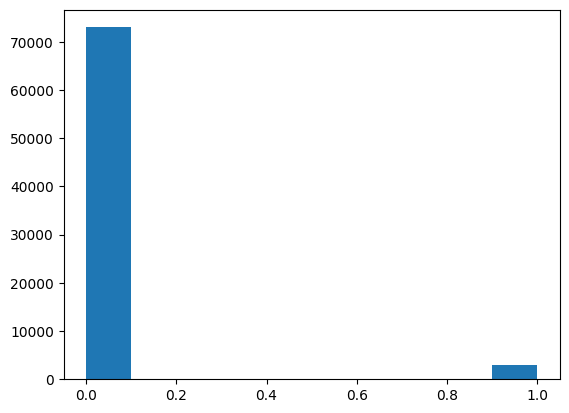

In [12]:
plt.hist(df['TARGET'])

There is a large inbalance between the target outputs. There is over 70000 instances of 0s, which means satisfied, and fewer than 5000 instances of 1s, which means unsatisfied. This will have to be balanced later by placing more weight on 1 so it appears as important as 0.

In [13]:
df_0=df[df['TARGET']==0]
df_1=df[df['TARGET']==1]

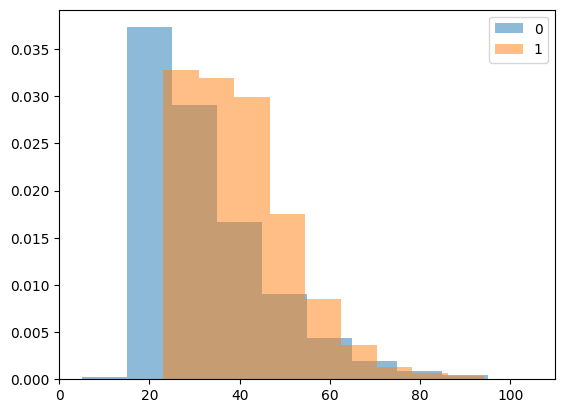

In [14]:
plt.hist(df_0['var15'], density=1, alpha=0.5, label='0')
plt.hist(df_1['var15'], density=1, alpha=0.5, label='1')
plt.legend()

An initial visualization of the target column against the var15 column, which is one of the columns with float data type. It is right skewed.

In [40]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['TARGET'].abs()

sorted_correlations = correlation_with_target.sort_values(ascending=False)

print("Top correlated features with TARGET:")
print(sorted_correlations.head(11))

Top correlated features with TARGET:
TARGET                 1.000000
ind_var30              0.149811
num_meses_var5_ult3    0.148253
num_var30              0.138289
num_var42              0.135693
ind_var5               0.135349
num_var5               0.134095
var36                  0.102919
var15                  0.101322
num_var4               0.080194
num_var35              0.076872
Name: TARGET, dtype: float64


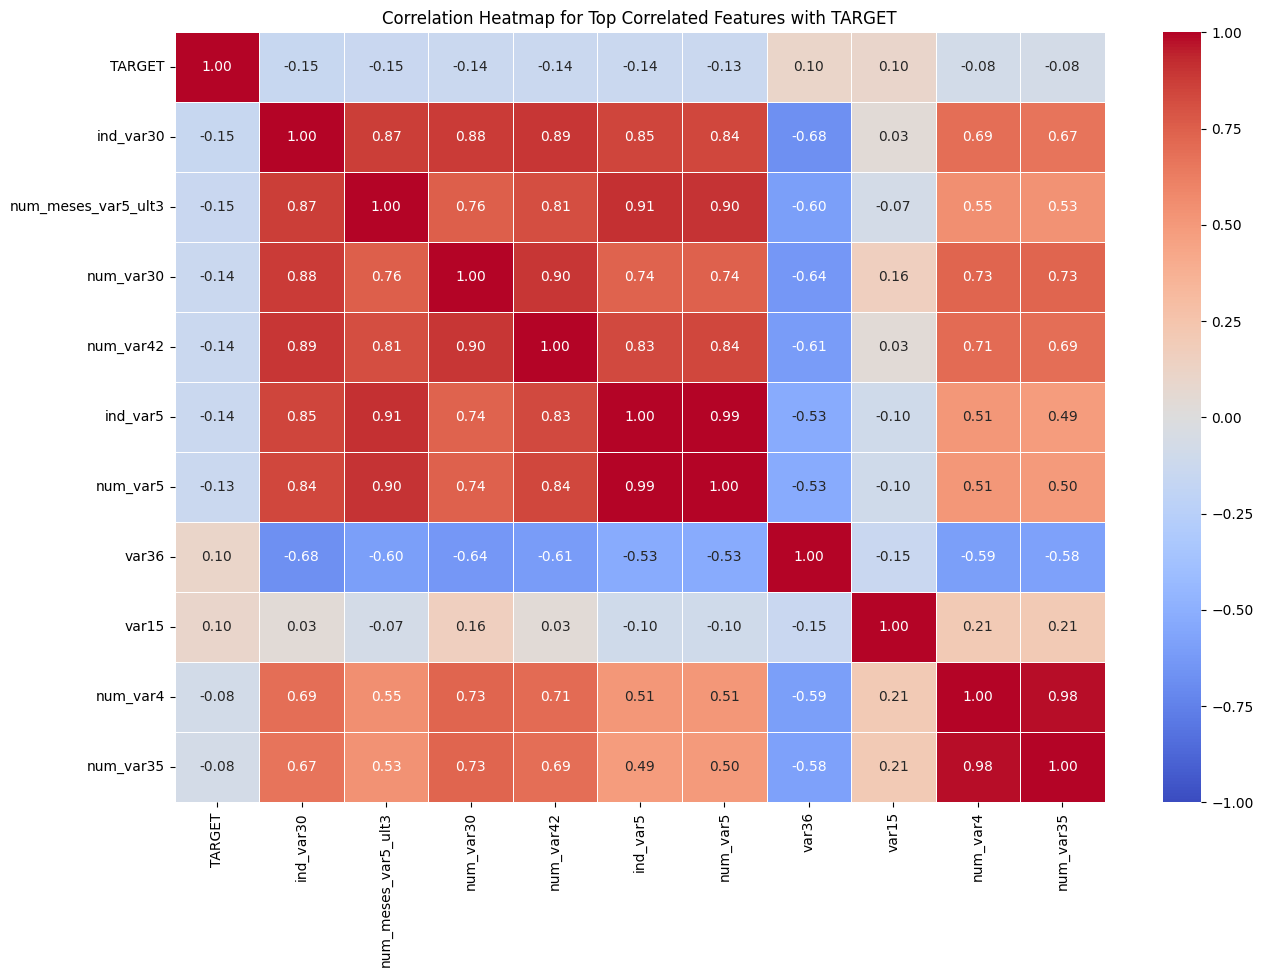

In [47]:
top_correlated_features = sorted_correlations.head(11).index
df_top_correlated = df[top_correlated_features]

plt.figure(figsize=(15, 10))
sns.heatmap(df_top_correlated.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Top Correlated Features with TARGET')
plt.show()

These are the ten column features that are most highly correlated with the target output. A lot of these features seem to be highly correlated with each other in both the positive and negative direction. Even though they are the most correlated with the target column, its still not that correlated with the highest correlation coefficient being only 0.149811.

In [50]:
n = df.shape[0]

# Check target type is float
a_value = df['TARGET'].to_numpy()[0]
float_check = isinstance(a_value, np.float64)

# Check number of unique targets
n_unique = len(np.unique(df['TARGET']))

# Filter only float columns
df_train_float = df.select_dtypes(include=['float'])

n_features = df_train_float.shape[1]
any_null = np.any(df_train_float.isnull())

In [51]:
binary_classification = n_unique == 2
multiclass_classification = n_unique < n / 10 and not binary_classification
regression = not binary_classification and not multiclass_classification

dataset_summary = {
    dataset_name: [dataset_name, binary_classification,
                   multiclass_classification, regression, n,
                   any_null, n_features]
}

In [52]:
def load_dataset(dataset_name):
    return {"Training": df, "Target": df['TARGET'], "Attributes": df.columns.tolist()}

binary_classification_datasets = list(map(lambda x: x[0], filter(lambda t: t[1][1], dataset_summary.items())))

In [53]:
# Load for binary classification
d1 = load_dataset(binary_classification_datasets[0])

In [56]:
def compare_features_binary(d, logscale=False, plots_per_iteration=None):
    # Divide into separate dfs
    df_0 = d["Training"][d["Target"] == 0]
    df_1 = d["Training"][d["Target"] == 1]

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])

    # Make a grid of plots
    N_Features = d["Training"].shape[1]
    N_X = math.ceil(math.sqrt(N_Features))
    N_Y = math.floor(math.sqrt(N_Features))
    if N_X * N_Y < N_Features:
        N_Y += 1

    print("Found", N_Features, "features. Creating a grid of", N_X, "by", N_Y)

    # Histogram 
    plt.figure(figsize=(50, 50))

    features = df_0.columns.tolist()

    for i, column in enumerate(features):
        KS_test = scipy.stats.kstest(df_0[column], df_1[column]).statistic
        print(column, "KS Distribution Similarity Test:", KS_test)

        plt.subplot(N_X, N_Y, i + 1)
        plt.title(str(KS_test))
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=100, histtype="step", color="red", label="0", density=1, stacked=True)
        plt.hist(df_1[column], bins=100, histtype="step", color="blue", label="1", density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)

        # show specified number of plots
        if plots_per_iteration is not None and ((i + 1) % plots_per_iteration == 0 or i == len(features) - 1):
            plt.show()
            plt.figure(figsize=(50, 50))

    plt.show()

Number of category 0: 73012
Number of category 1: 3008
Found 371 features. Creating a grid of 20 by 19
ID KS Distribution Similarity Test: 0.02309575531740049
var3 KS Distribution Similarity Test: 0.00819921324503925
var15 KS Distribution Similarity Test: 0.360369918060686
imp_ent_var16_ult1 KS Distribution Similarity Test: 0.0054845072101233905
imp_op_var39_comer_ult1 KS Distribution Similarity Test: 0.013884904230257678
imp_op_var39_comer_ult3 KS Distribution Similarity Test: 0.014440336097476192
imp_op_var40_comer_ult1 KS Distribution Similarity Test: 0.0018601940689435548
imp_op_var40_comer_ult3 KS Distribution Similarity Test: 0.001730697722671093
imp_op_var40_efect_ult1 KS Distribution Similarity Test: 0.0032871126693250208
imp_op_var40_efect_ult3 KS Distribution Similarity Test: 0.003592166720480905
imp_op_var40_ult1 KS Distribution Similarity Test: 0.0022399589516617358
imp_op_var41_comer_ult1 KS Distribution Similarity Test: 0.012203983373179073
imp_op_var41_comer_ult3 KS Dist

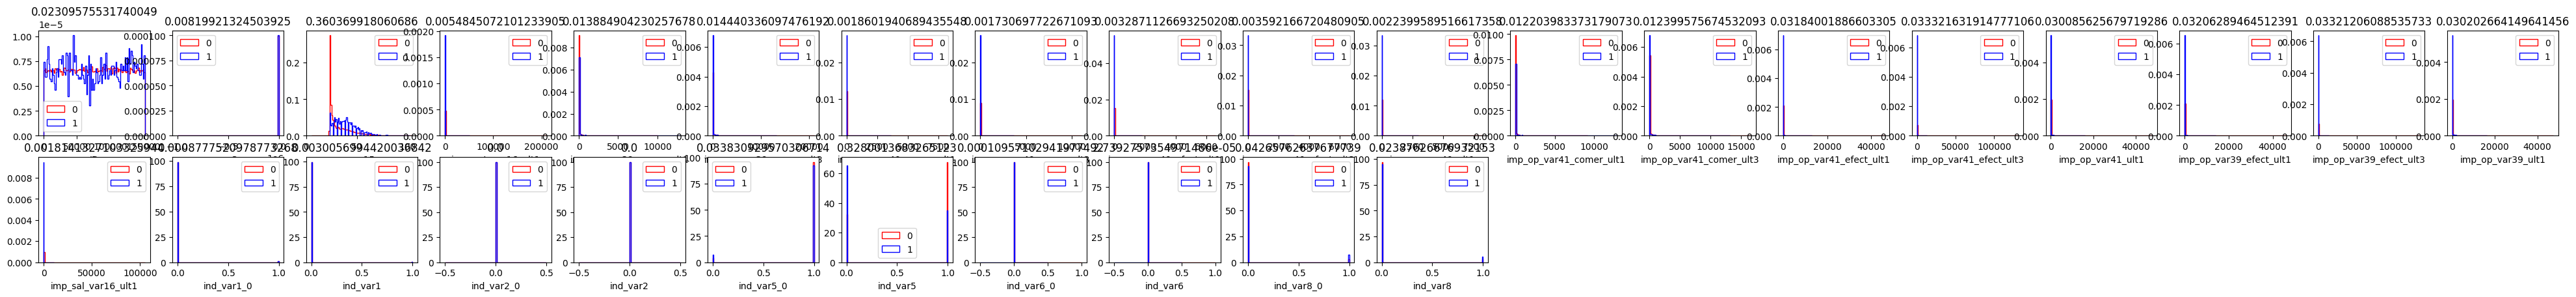

ind_var12_0 KS Distribution Similarity Test: 0.04918877733301774
ind_var12 KS Distribution Similarity Test: 0.03660424590653133
ind_var13_0 KS Distribution Similarity Test: 0.04505615005286223
ind_var13_corto_0 KS Distribution Similarity Test: 0.03570525713639616
ind_var13_corto KS Distribution Similarity Test: 0.03522338866476049
ind_var13_largo_0 KS Distribution Similarity Test: 0.009895014343313968
ind_var13_largo KS Distribution Similarity Test: 0.00971696142050682
ind_var13_medio_0 KS Distribution Similarity Test: 2.7392757354971486e-05
ind_var13_medio KS Distribution Similarity Test: 2.7392757354971486e-05
ind_var13 KS Distribution Similarity Test: 0.04464276347461393
ind_var14_0 KS Distribution Similarity Test: 0.01562636599521383
ind_var14 KS Distribution Similarity Test: 0.002750495109518636
ind_var17_0 KS Distribution Similarity Test: 0.0011841175044382535
ind_var17 KS Distribution Similarity Test: 0.0008143152801463049
ind_var18_0 KS Distribution Similarity Test: 2.739275735

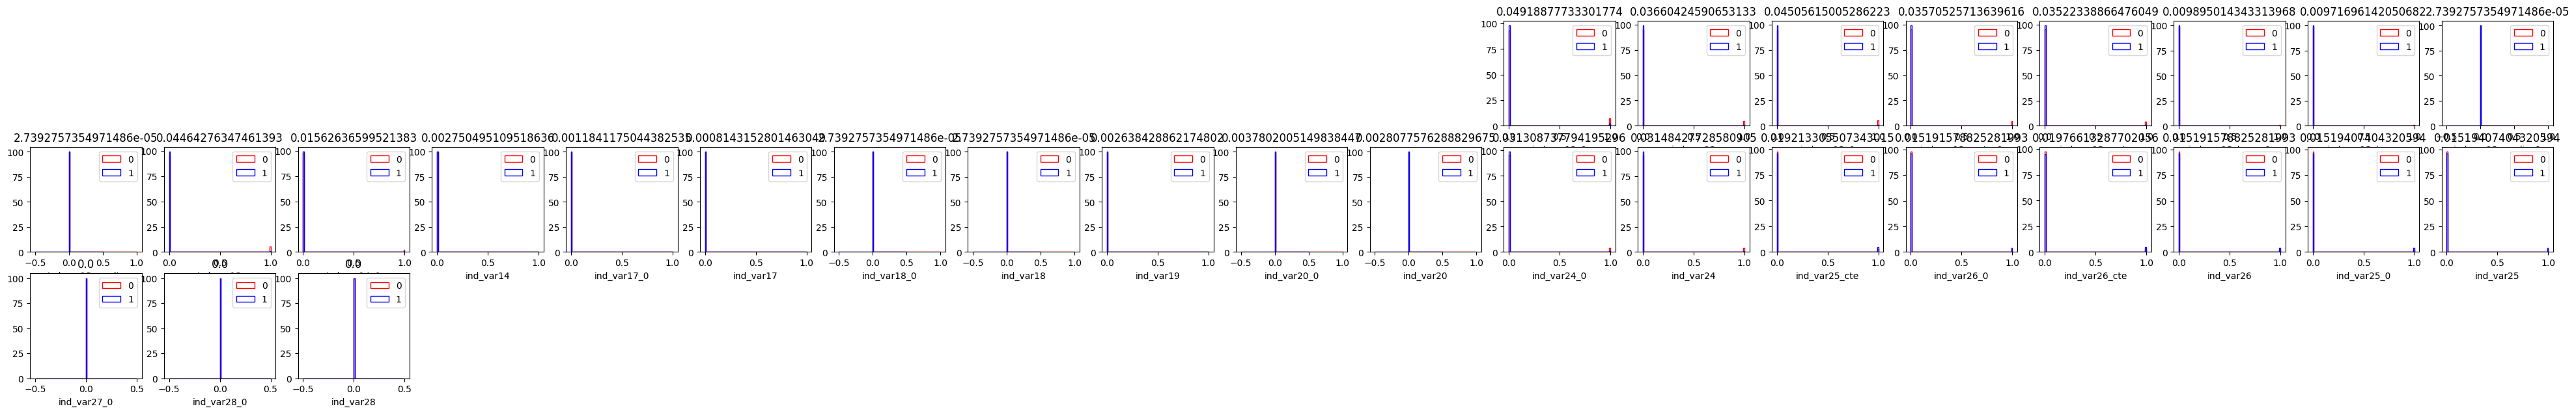

ind_var27 KS Distribution Similarity Test: 0.0
ind_var29_0 KS Distribution Similarity Test: 0.00010957102941977492
ind_var29 KS Distribution Similarity Test: 2.7392757354971486e-05
ind_var30_0 KS Distribution Similarity Test: 0.003313285137622379
ind_var30 KS Distribution Similarity Test: 0.34003828137840353
ind_var31_0 KS Distribution Similarity Test: 0.0030667503214277803
ind_var31 KS Distribution Similarity Test: 0.00243671690226388
ind_var32_cte KS Distribution Similarity Test: 0.00047064909761262985
ind_var32_0 KS Distribution Similarity Test: 8.467348998886237e-05
ind_var32 KS Distribution Similarity Test: 8.467348998886237e-05
ind_var33_0 KS Distribution Similarity Test: 0.0007806935846161878
ind_var33 KS Distribution Similarity Test: 0.0006574261765189826
ind_var34_0 KS Distribution Similarity Test: 2.7392757354971486e-05
ind_var34 KS Distribution Similarity Test: 2.7392757354971486e-05
ind_var37_cte KS Distribution Similarity Test: 0.0032992062802850164
ind_var37_0 KS Distribu

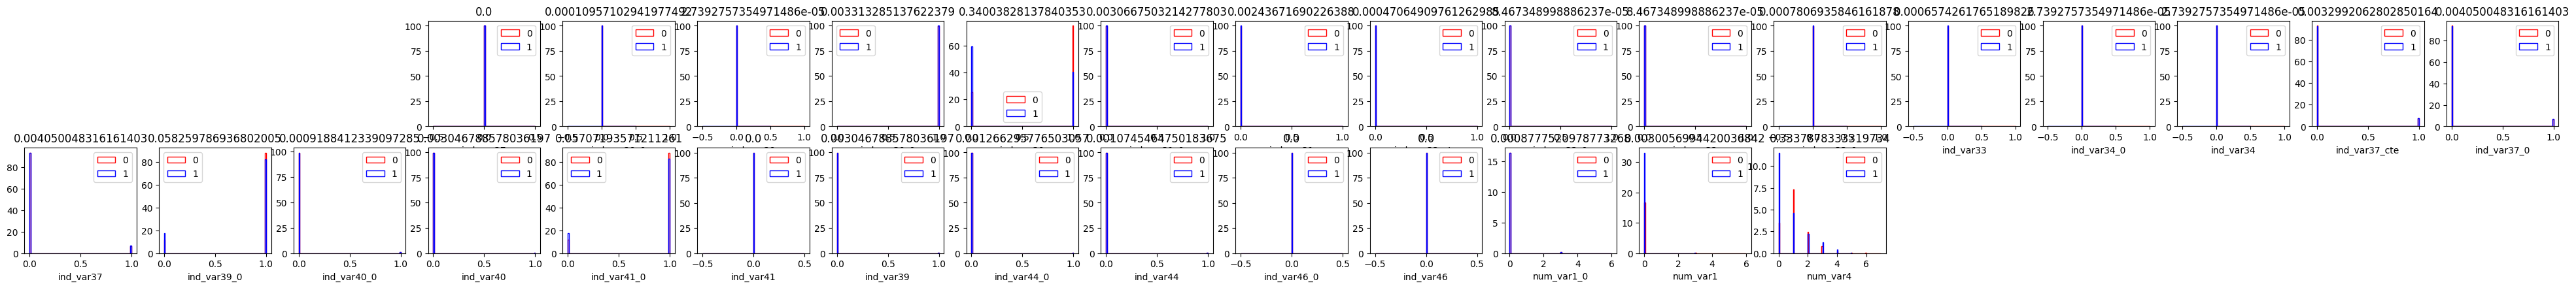

num_var5_0 KS Distribution Similarity Test: 0.033830929570306714
num_var5 KS Distribution Similarity Test: 0.3280013683265123
num_var6_0 KS Distribution Similarity Test: 0.00010957102941977492
num_var6 KS Distribution Similarity Test: 2.7392757354971486e-05
num_var8_0 KS Distribution Similarity Test: 0.04265762637677739
num_var8 KS Distribution Similarity Test: 0.02387626676932153
num_var12_0 KS Distribution Similarity Test: 0.04918877733301774
num_var12 KS Distribution Similarity Test: 0.03660424590653133
num_var13_0 KS Distribution Similarity Test: 0.04505615005286223
num_var13_corto_0 KS Distribution Similarity Test: 0.03570525713639616
num_var13_corto KS Distribution Similarity Test: 0.03522338866476049
num_var13_largo_0 KS Distribution Similarity Test: 0.009895014343313968
num_var13_largo KS Distribution Similarity Test: 0.00971696142050682
num_var13_medio_0 KS Distribution Similarity Test: 2.7392757354971486e-05
num_var13_medio KS Distribution Similarity Test: 2.7392757354971486e

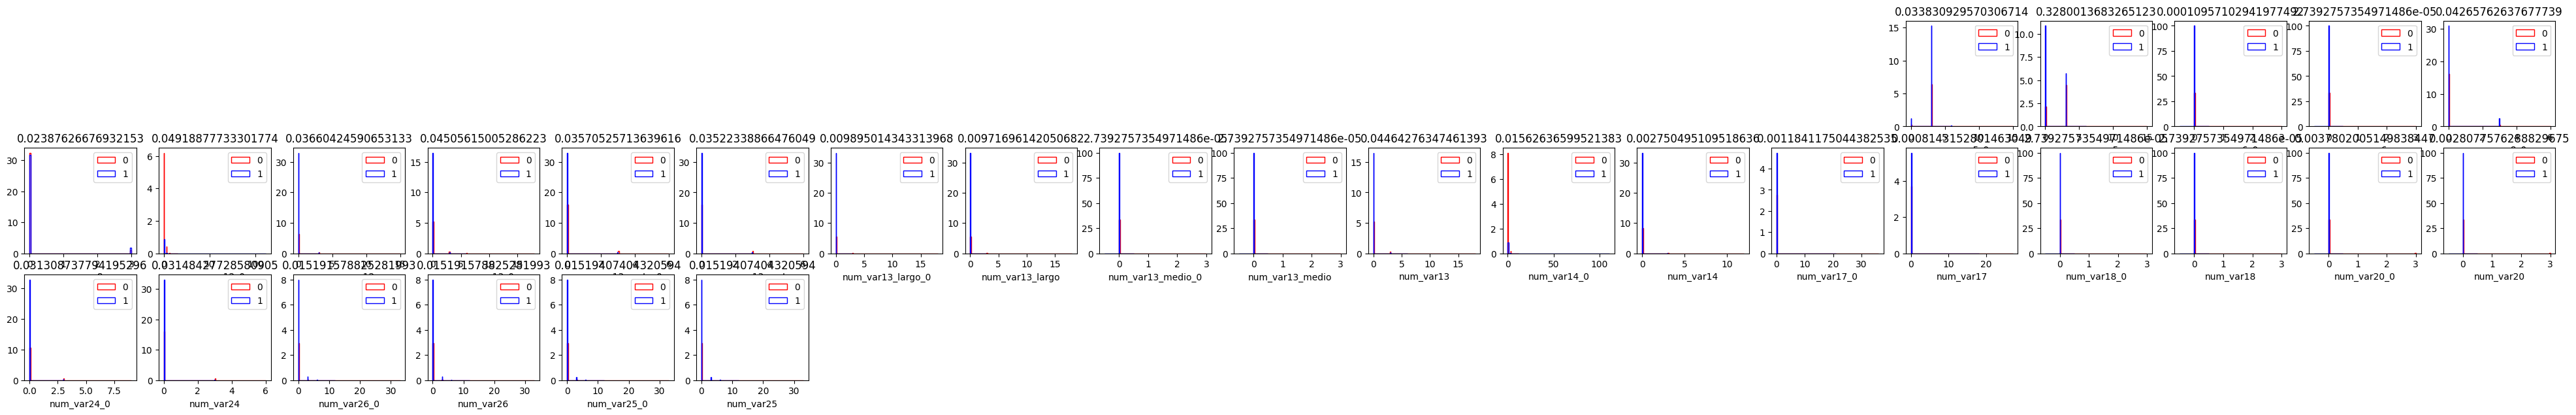

num_op_var40_hace2 KS Distribution Similarity Test: 0.00070474425072653
num_op_var40_hace3 KS Distribution Similarity Test: 9.587465074234469e-05
num_op_var40_ult1 KS Distribution Similarity Test: 0.0015576352357117296
num_op_var40_ult3 KS Distribution Similarity Test: 0.0012563149048071542
num_op_var41_hace2 KS Distribution Similarity Test: 0.01180469386553773
num_op_var41_hace3 KS Distribution Similarity Test: 0.0019449404120104319
num_op_var41_ult1 KS Distribution Similarity Test: 0.012350217714138578
num_op_var41_ult3 KS Distribution Similarity Test: 0.01599706066971207
num_op_var39_hace2 KS Distribution Similarity Test: 0.011160964067696288
num_op_var39_hace3 KS Distribution Similarity Test: 0.0020408150627527766
num_op_var39_ult1 KS Distribution Similarity Test: 0.012707525635541117
num_op_var39_ult3 KS Distribution Similarity Test: 0.015284848978483256
num_var27_0 KS Distribution Similarity Test: 0.0
num_var28_0 KS Distribution Similarity Test: 0.0
num_var28 KS Distribution Simi

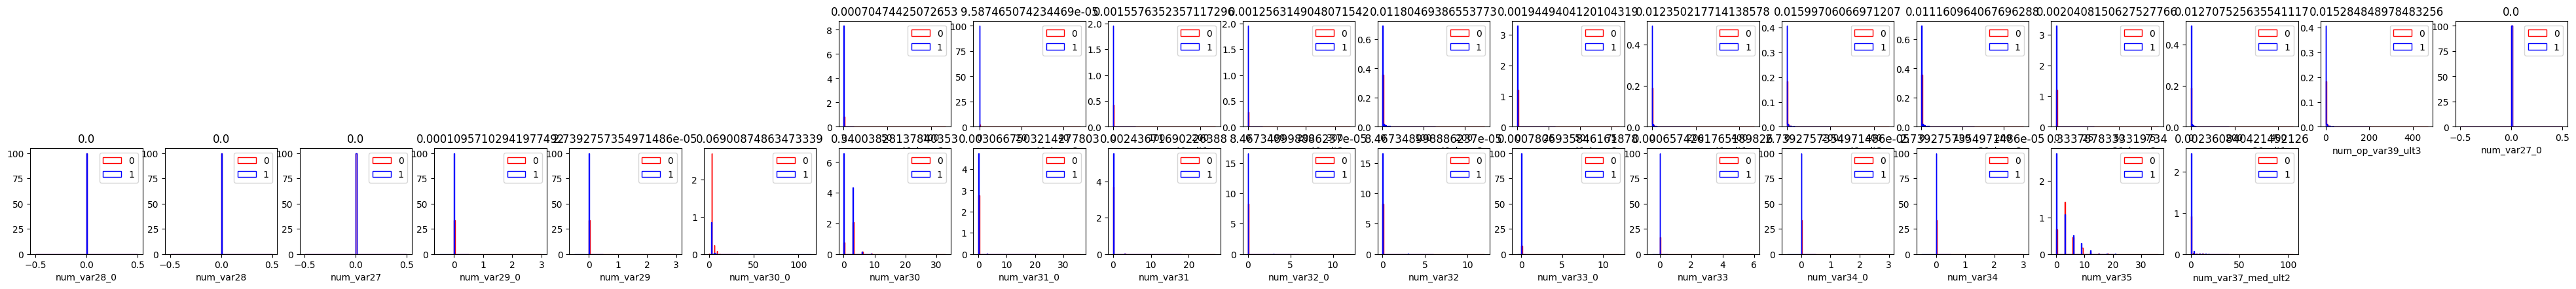

num_var37_0 KS Distribution Similarity Test: 0.004050048316161403
num_var37 KS Distribution Similarity Test: 0.004050048316161403
num_var39_0 KS Distribution Similarity Test: 0.058259786936802005
num_var40_0 KS Distribution Similarity Test: 0.0009188412339097285
num_var40 KS Distribution Similarity Test: 0.003046788578036197
num_var41_0 KS Distribution Similarity Test: 0.05707193571211261
num_var41 KS Distribution Similarity Test: 0.0
num_var39 KS Distribution Similarity Test: 0.003046788578036197
num_var42_0 KS Distribution Similarity Test: 0.04374388398409579
num_var42 KS Distribution Similarity Test: 0.32818962068024954
num_var44_0 KS Distribution Similarity Test: 0.001266295776503057
num_var44 KS Distribution Similarity Test: 0.0010745464750183675
num_var46_0 KS Distribution Similarity Test: 0.0
num_var46 KS Distribution Similarity Test: 0.0
saldo_var1 KS Distribution Similarity Test: 0.004056586879918278
saldo_var5 KS Distribution Similarity Test: 0.3432714463434166
saldo_var6 KS 

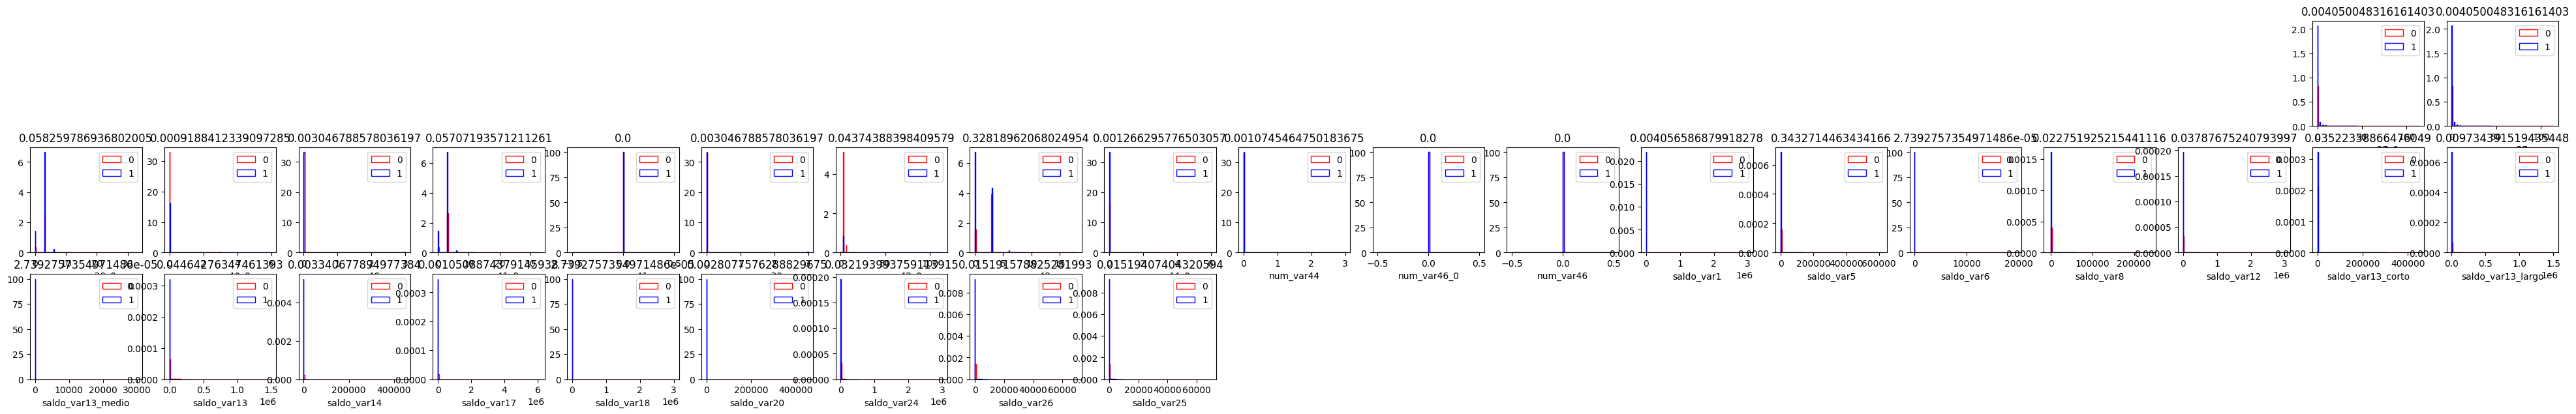

saldo_var28 KS Distribution Similarity Test: 0.0
saldo_var27 KS Distribution Similarity Test: 0.0
saldo_var29 KS Distribution Similarity Test: 2.7392757354971486e-05
saldo_var30 KS Distribution Similarity Test: 0.36124384537196447
saldo_var31 KS Distribution Similarity Test: 0.00243671690226388
saldo_var32 KS Distribution Similarity Test: 0.0006412345799174934
saldo_var33 KS Distribution Similarity Test: 0.0006574261765189826
saldo_var34 KS Distribution Similarity Test: 2.7392757354971486e-05
saldo_var37 KS Distribution Similarity Test: 0.006188049385061789
saldo_var40 KS Distribution Similarity Test: 0.004097676015950791
saldo_var41 KS Distribution Similarity Test: 0.0
saldo_var42 KS Distribution Similarity Test: 0.3430027459782187
saldo_var44 KS Distribution Similarity Test: 0.0010745464750183675
saldo_var46 KS Distribution Similarity Test: 0.0
var36 KS Distribution Similarity Test: 0.25905756821087994
delta_imp_amort_var18_1y3 KS Distribution Similarity Test: 2.7392757354971486e-05


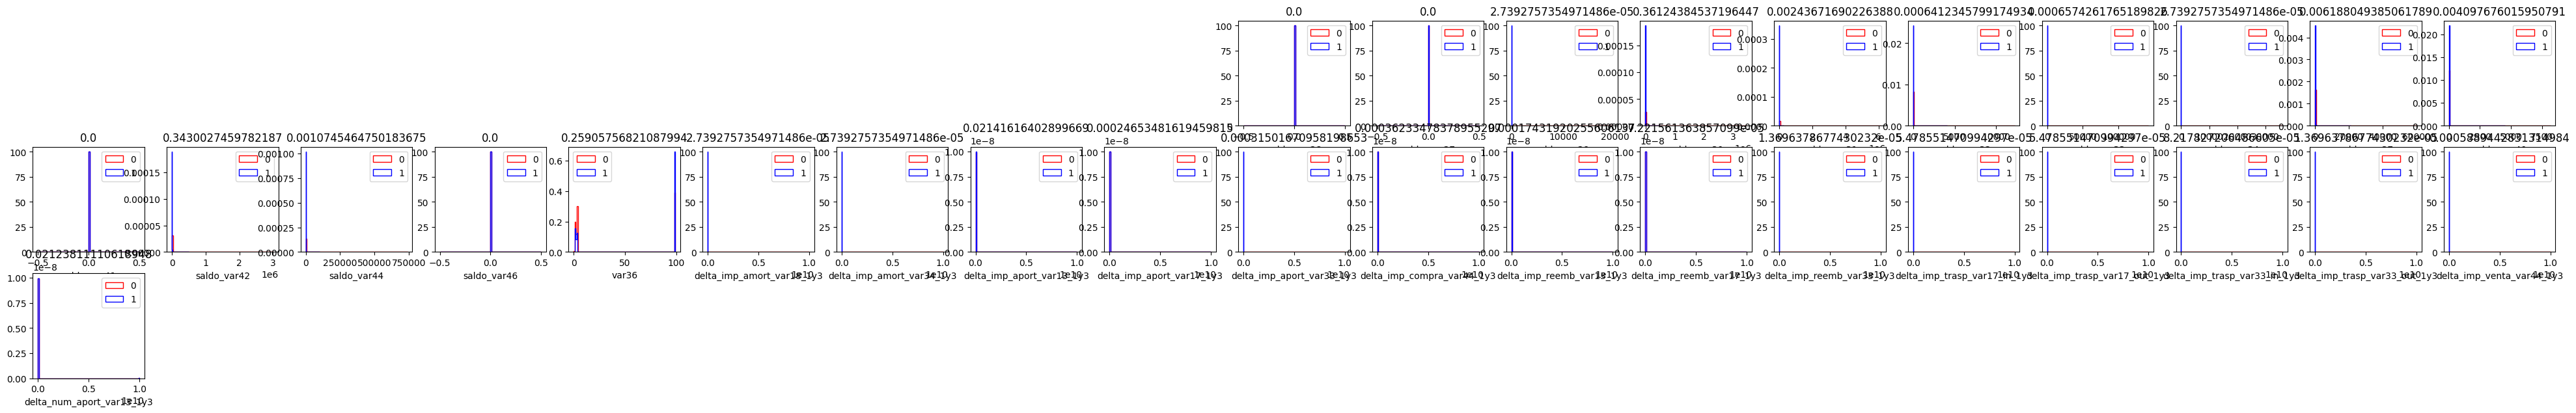

delta_num_aport_var17_1y3 KS Distribution Similarity Test: 0.00024653481619459815
delta_num_aport_var33_1y3 KS Distribution Similarity Test: 0.00024653481619459815
delta_num_compra_var44_1y3 KS Distribution Similarity Test: 0.00036233478378955297
delta_num_reemb_var13_1y3 KS Distribution Similarity Test: 0.00017431920255606137
delta_num_reemb_var17_1y3 KS Distribution Similarity Test: 7.221561363857099e-05
delta_num_reemb_var33_1y3 KS Distribution Similarity Test: 1.3696378677430232e-05
delta_num_trasp_var17_in_1y3 KS Distribution Similarity Test: 5.478551470994297e-05
delta_num_trasp_var17_out_1y3 KS Distribution Similarity Test: 5.478551470994297e-05
delta_num_trasp_var33_in_1y3 KS Distribution Similarity Test: 8.217827206486605e-05
delta_num_trasp_var33_out_1y3 KS Distribution Similarity Test: 1.3696378677430232e-05
delta_num_venta_var44_1y3 KS Distribution Similarity Test: 0.0005889442831314984
imp_amort_var18_hace3 KS Distribution Similarity Test: 0.0
imp_amort_var18_ult1 KS Distr

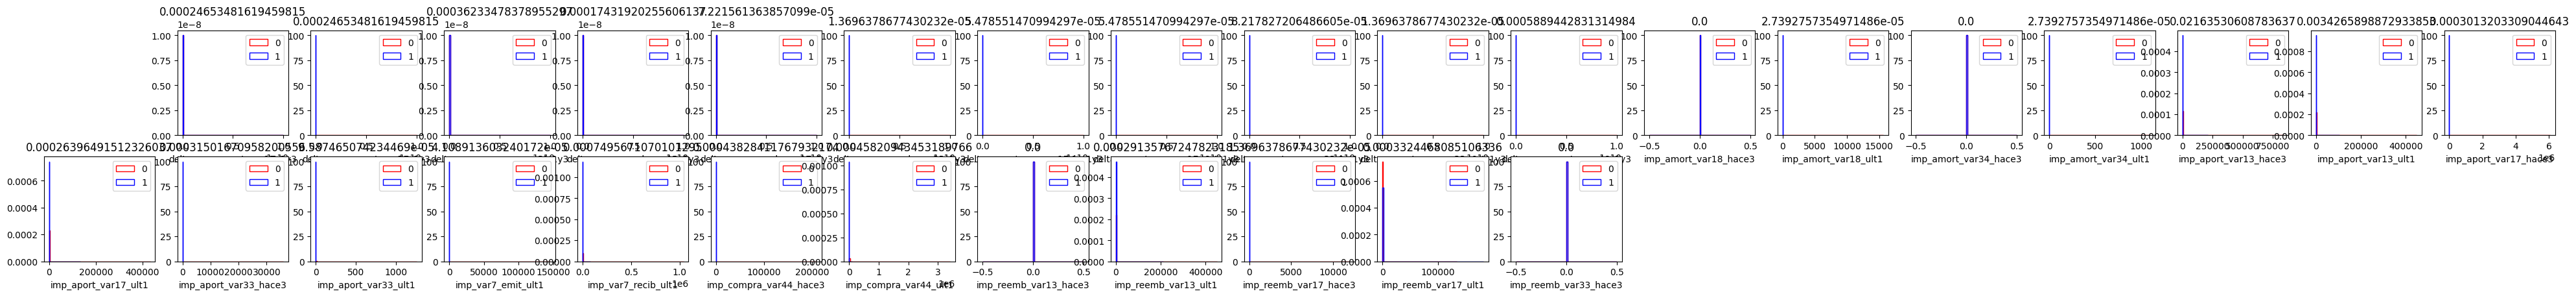

imp_reemb_var33_ult1 KS Distribution Similarity Test: 1.3696378677430232e-05
imp_var43_emit_ult1 KS Distribution Similarity Test: 0.010560181159378068
imp_trans_var37_ult1 KS Distribution Similarity Test: 0.03685866706842711
imp_trasp_var17_in_hace3 KS Distribution Similarity Test: 2.7392757354971486e-05
imp_trasp_var17_in_ult1 KS Distribution Similarity Test: 5.478551470994297e-05
imp_trasp_var17_out_hace3 KS Distribution Similarity Test: 0.0
imp_trasp_var17_out_ult1 KS Distribution Similarity Test: 5.478551470994297e-05
imp_trasp_var33_in_hace3 KS Distribution Similarity Test: 8.217827206491446e-05
imp_trasp_var33_in_ult1 KS Distribution Similarity Test: 6.84818933873732e-05
imp_trasp_var33_out_hace3 KS Distribution Similarity Test: 0.0
imp_trasp_var33_out_ult1 KS Distribution Similarity Test: 1.3696378677430232e-05
imp_venta_var44_hace3 KS Distribution Similarity Test: 4.108913603240172e-05
imp_venta_var44_ult1 KS Distribution Similarity Test: 0.0006026406618090396
ind_var7_emit_ult

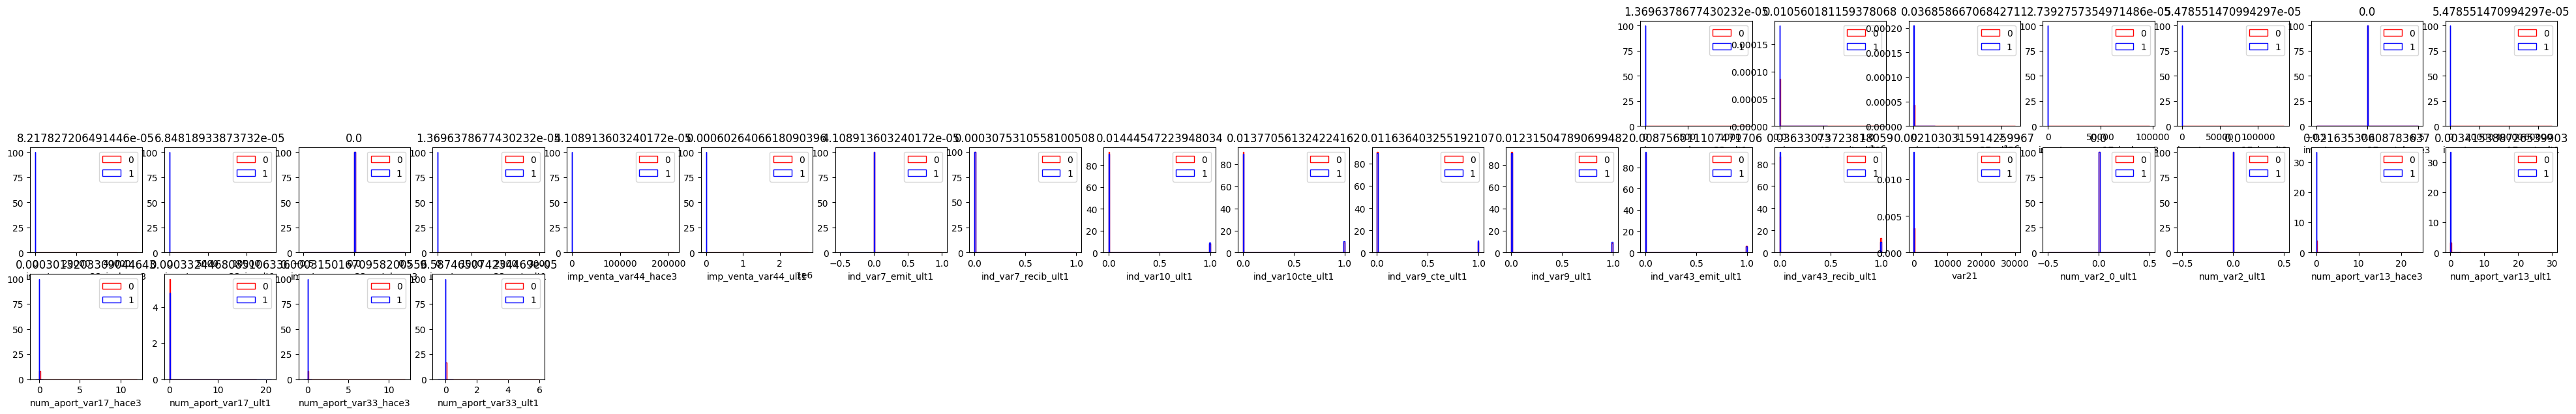

num_var7_emit_ult1 KS Distribution Similarity Test: 4.108913603240172e-05
num_var7_recib_ult1 KS Distribution Similarity Test: 0.0003075310558100508
num_compra_var44_hace3 KS Distribution Similarity Test: 0.00043828411767932174
num_compra_var44_ult1 KS Distribution Similarity Test: 0.0005204623897441252
num_ent_var16_ult1 KS Distribution Similarity Test: 0.0054845072101233905
num_var22_hace2 KS Distribution Similarity Test: 0.009719128799579368
num_var22_hace3 KS Distribution Similarity Test: 0.012506451140063213
num_var22_ult1 KS Distribution Similarity Test: 0.020420990982537468
num_var22_ult3 KS Distribution Similarity Test: 0.016785239908100213
num_med_var22_ult3 KS Distribution Similarity Test: 0.016785239908100213
num_med_var45_ult3 KS Distribution Similarity Test: 0.05360400170301349
num_meses_var5_ult3 KS Distribution Similarity Test: 0.3377370712013531
num_meses_var8_ult3 KS Distribution Similarity Test: 0.025737717553861783
num_meses_var12_ult3 KS Distribution Similarity Test

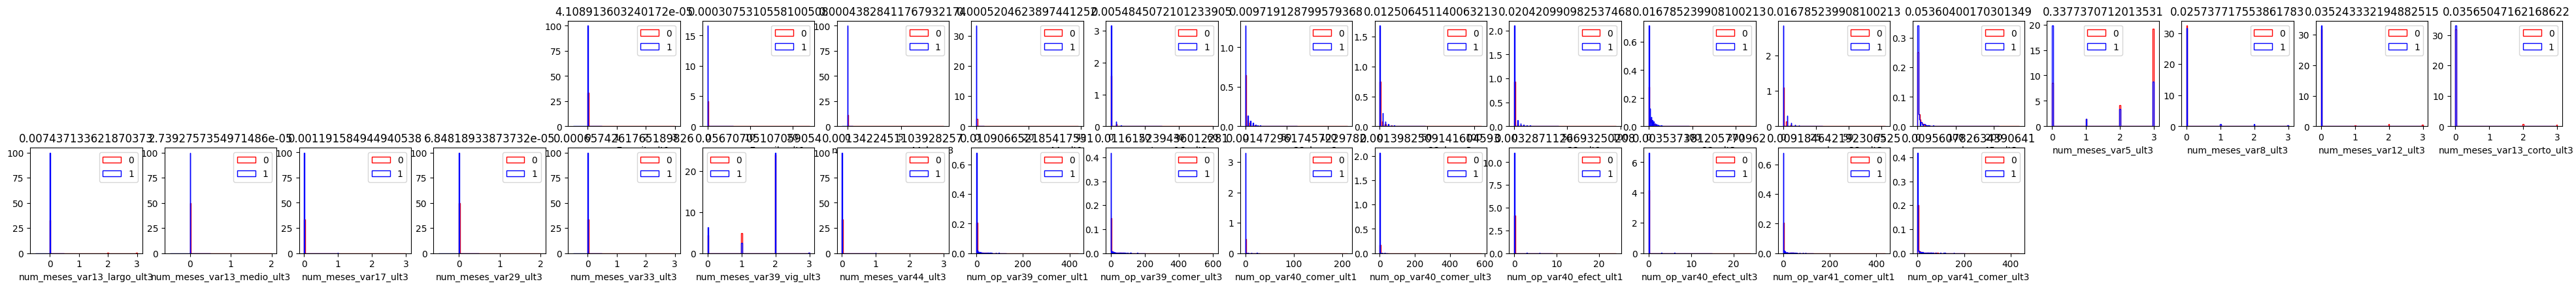

num_op_var41_efect_ult1 KS Distribution Similarity Test: 0.01875995901577243
num_op_var41_efect_ult3 KS Distribution Similarity Test: 0.020159375579182015
num_op_var39_efect_ult1 KS Distribution Similarity Test: 0.019335297986574074
num_op_var39_efect_ult3 KS Distribution Similarity Test: 0.020382251358272874
num_reemb_var13_hace3 KS Distribution Similarity Test: 0.0
num_reemb_var13_ult1 KS Distribution Similarity Test: 0.00017431920255606137
num_reemb_var17_hace3 KS Distribution Similarity Test: 1.3696378677430232e-05
num_reemb_var17_ult1 KS Distribution Similarity Test: 0.0003324468085106336
num_reemb_var33_hace3 KS Distribution Similarity Test: 0.0
num_reemb_var33_ult1 KS Distribution Similarity Test: 1.3696378677430232e-05
num_sal_var16_ult1 KS Distribution Similarity Test: 0.0018004363316551641
num_var43_emit_ult1 KS Distribution Similarity Test: 0.008756011107471706
num_var43_recib_ult1 KS Distribution Similarity Test: 0.03633073723818059
num_trasp_var11_ult1 KS Distribution Simi

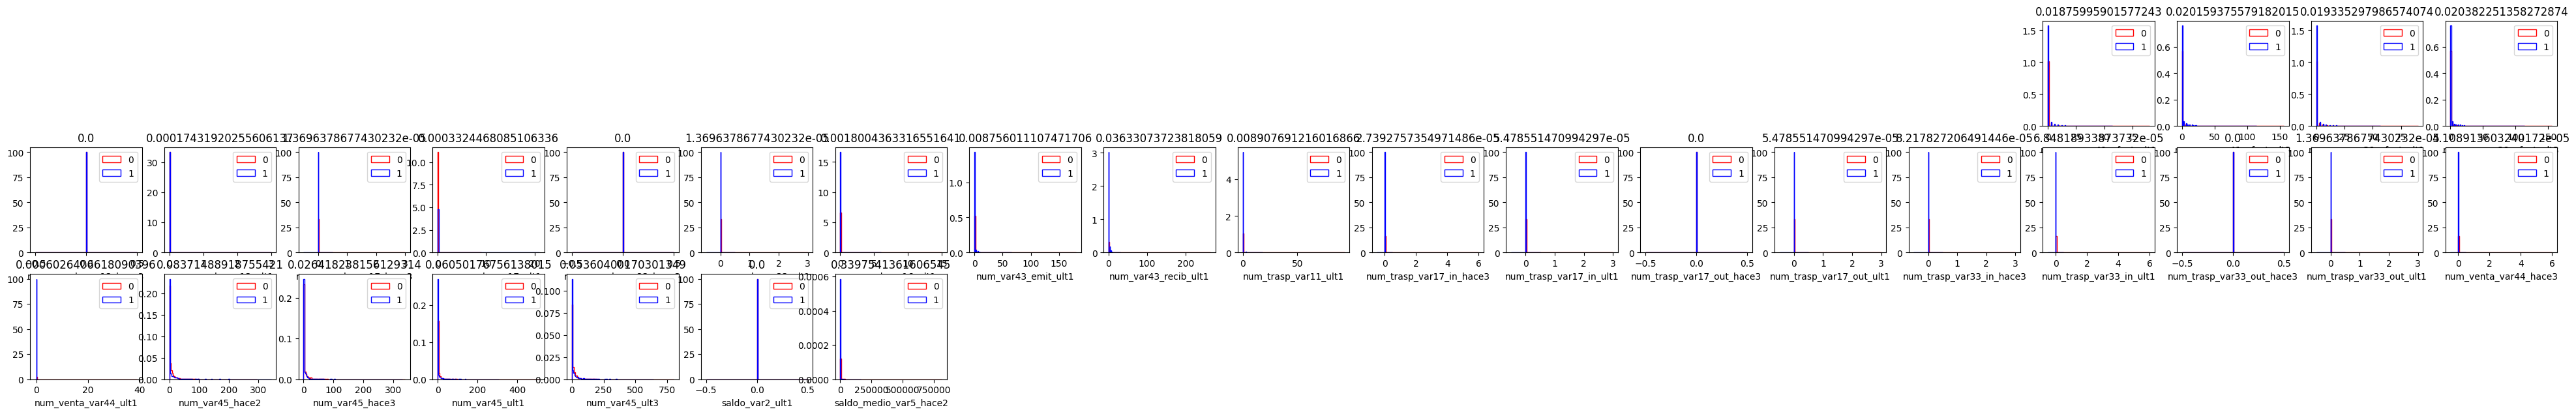

saldo_medio_var5_hace3 KS Distribution Similarity Test: 0.32620812623631673
saldo_medio_var5_ult1 KS Distribution Similarity Test: 0.34197285844005826
saldo_medio_var5_ult3 KS Distribution Similarity Test: 0.3364520157572466
saldo_medio_var8_hace2 KS Distribution Similarity Test: 0.014715975718360474
saldo_medio_var8_hace3 KS Distribution Similarity Test: 0.005499660650362337
saldo_medio_var8_ult1 KS Distribution Similarity Test: 0.022659784284949858
saldo_medio_var8_ult3 KS Distribution Similarity Test: 0.022988497373209404
saldo_medio_var12_hace2 KS Distribution Similarity Test: 0.03305686561579502
saldo_medio_var12_hace3 KS Distribution Similarity Test: 0.013923006390089254
saldo_medio_var12_ult1 KS Distribution Similarity Test: 0.0374857863644682
saldo_medio_var12_ult3 KS Distribution Similarity Test: 0.037482052644217
saldo_medio_var13_corto_hace2 KS Distribution Similarity Test: 0.03345032687719063
saldo_medio_var13_corto_hace3 KS Distribution Similarity Test: 0.01693744820146148

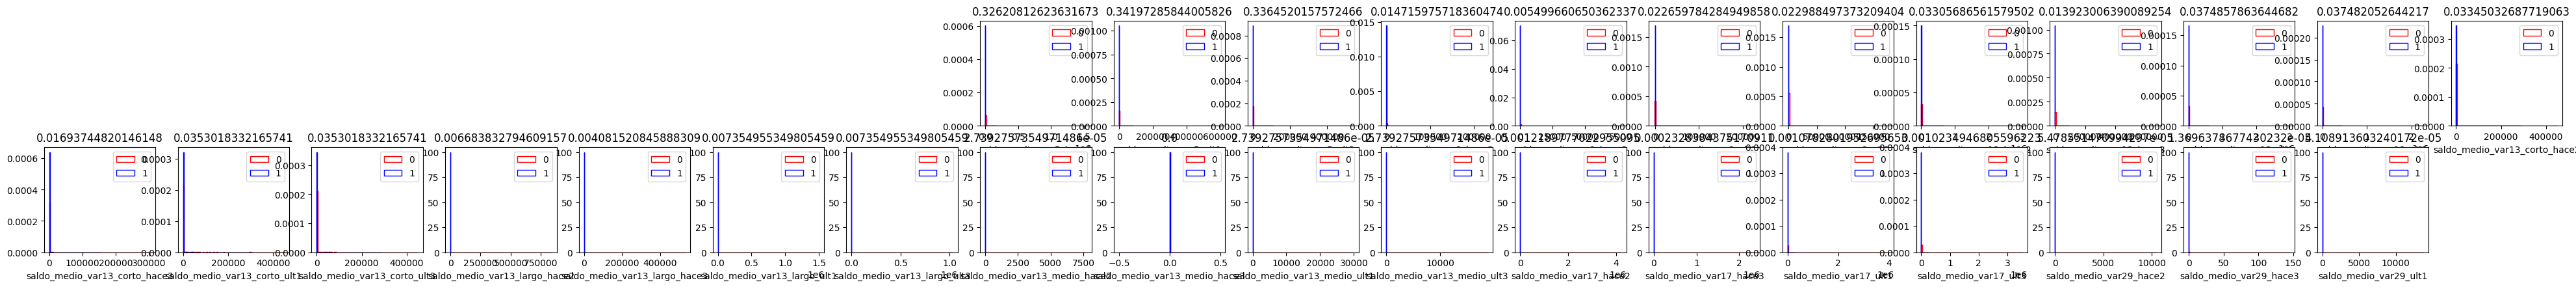

saldo_medio_var29_ult3 KS Distribution Similarity Test: 4.108913603240172e-05
saldo_medio_var33_hace2 KS Distribution Similarity Test: 0.0005889442831314984
saldo_medio_var33_hace3 KS Distribution Similarity Test: 0.0003287130882594358
saldo_medio_var33_ult1 KS Distribution Similarity Test: 0.0006574261765189826
saldo_medio_var33_ult3 KS Distribution Similarity Test: 0.0006574261765189826
saldo_medio_var44_hace2 KS Distribution Similarity Test: 0.001355941489070256
saldo_medio_var44_hace3 KS Distribution Similarity Test: 0.00043828411767932174
saldo_medio_var44_ult1 KS Distribution Similarity Test: 0.0012389030191480854
saldo_medio_var44_ult3 KS Distribution Similarity Test: 0.0012389030191480854
var38 KS Distribution Similarity Test: 0.12180437258346338
TARGET KS Distribution Similarity Test: 1.0


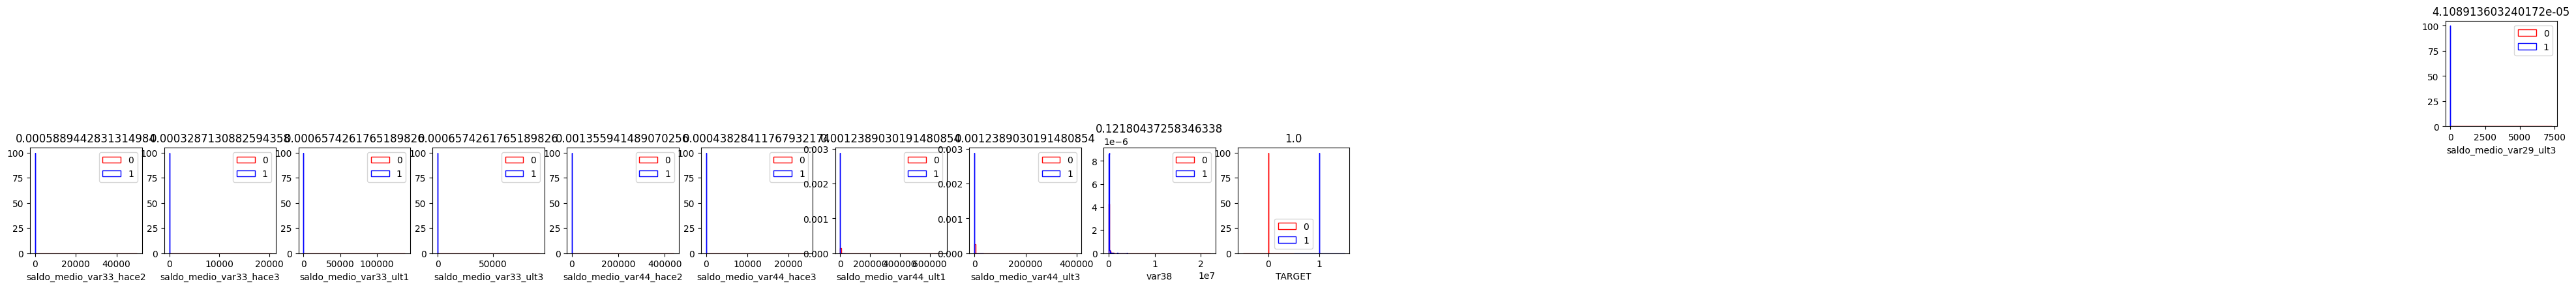

<Figure size 5000x5000 with 0 Axes>

In [57]:
compare_features_binary(d1, plots_per_iteration=30)

I thought that it would be better to use float type data to visualize in these histograms, as they would be more likely to produce a distribution curve as the integer types are mostly binary. This was not the case, because the float types did include these binary types as well so many of the plots have only 0 and 1 or 1,2,3,4,5. .

In [62]:
def compare_corr_features_binary(d, logscale=False, top_features=10):
    # Divide into separate dfs
    df_0 = d["Training"][d["Target"] == 0]
    df_1 = d["Training"][d["Target"] == 1]

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])

    # top correlated features
    top_correlated_features = d["Training"].corr()['TARGET'].abs().sort_values(ascending=False).head(top_features).index

    # Make a grid of plots
    N_Features = len(top_correlated_features)
    N_X = math.ceil(math.sqrt(N_Features))
    N_Y = math.floor(math.sqrt(N_Features))
    if N_X * N_Y < N_Features:
        N_Y += 1

    print("Found", N_Features, "features. Creating a grid of", N_X, "by", N_Y)

    # Histogram 
    plt.figure(figsize=(50, 50))

    for i, column in enumerate(top_correlated_features):
        KS_test = scipy.stats.kstest(df_0[column], df_1[column]).statistic
        print(column, "KS Distribution Similarity Test:", KS_test)

        plt.subplot(N_X, N_Y, i + 1)
        plt.title(str(KS_test))
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=100, histtype="step", color="red", label="0", density=1, stacked=True)
        plt.hist(df_1[column], bins=100, histtype="step", color="blue", label="1", density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)

    plt.show()


Number of category 0: 73012
Number of category 1: 3008
Found 10 features. Creating a grid of 4 by 3
TARGET KS Distribution Similarity Test: 1.0
ind_var30 KS Distribution Similarity Test: 0.34003828137840353
num_meses_var5_ult3 KS Distribution Similarity Test: 0.3377370712013531
num_var30 KS Distribution Similarity Test: 0.34003828137840353
num_var42 KS Distribution Similarity Test: 0.32818962068024954
ind_var5 KS Distribution Similarity Test: 0.3280013683265123
num_var5 KS Distribution Similarity Test: 0.3280013683265123
var36 KS Distribution Similarity Test: 0.25905756821087994
var15 KS Distribution Similarity Test: 0.360369918060686
num_var4 KS Distribution Similarity Test: 0.3337878333319734


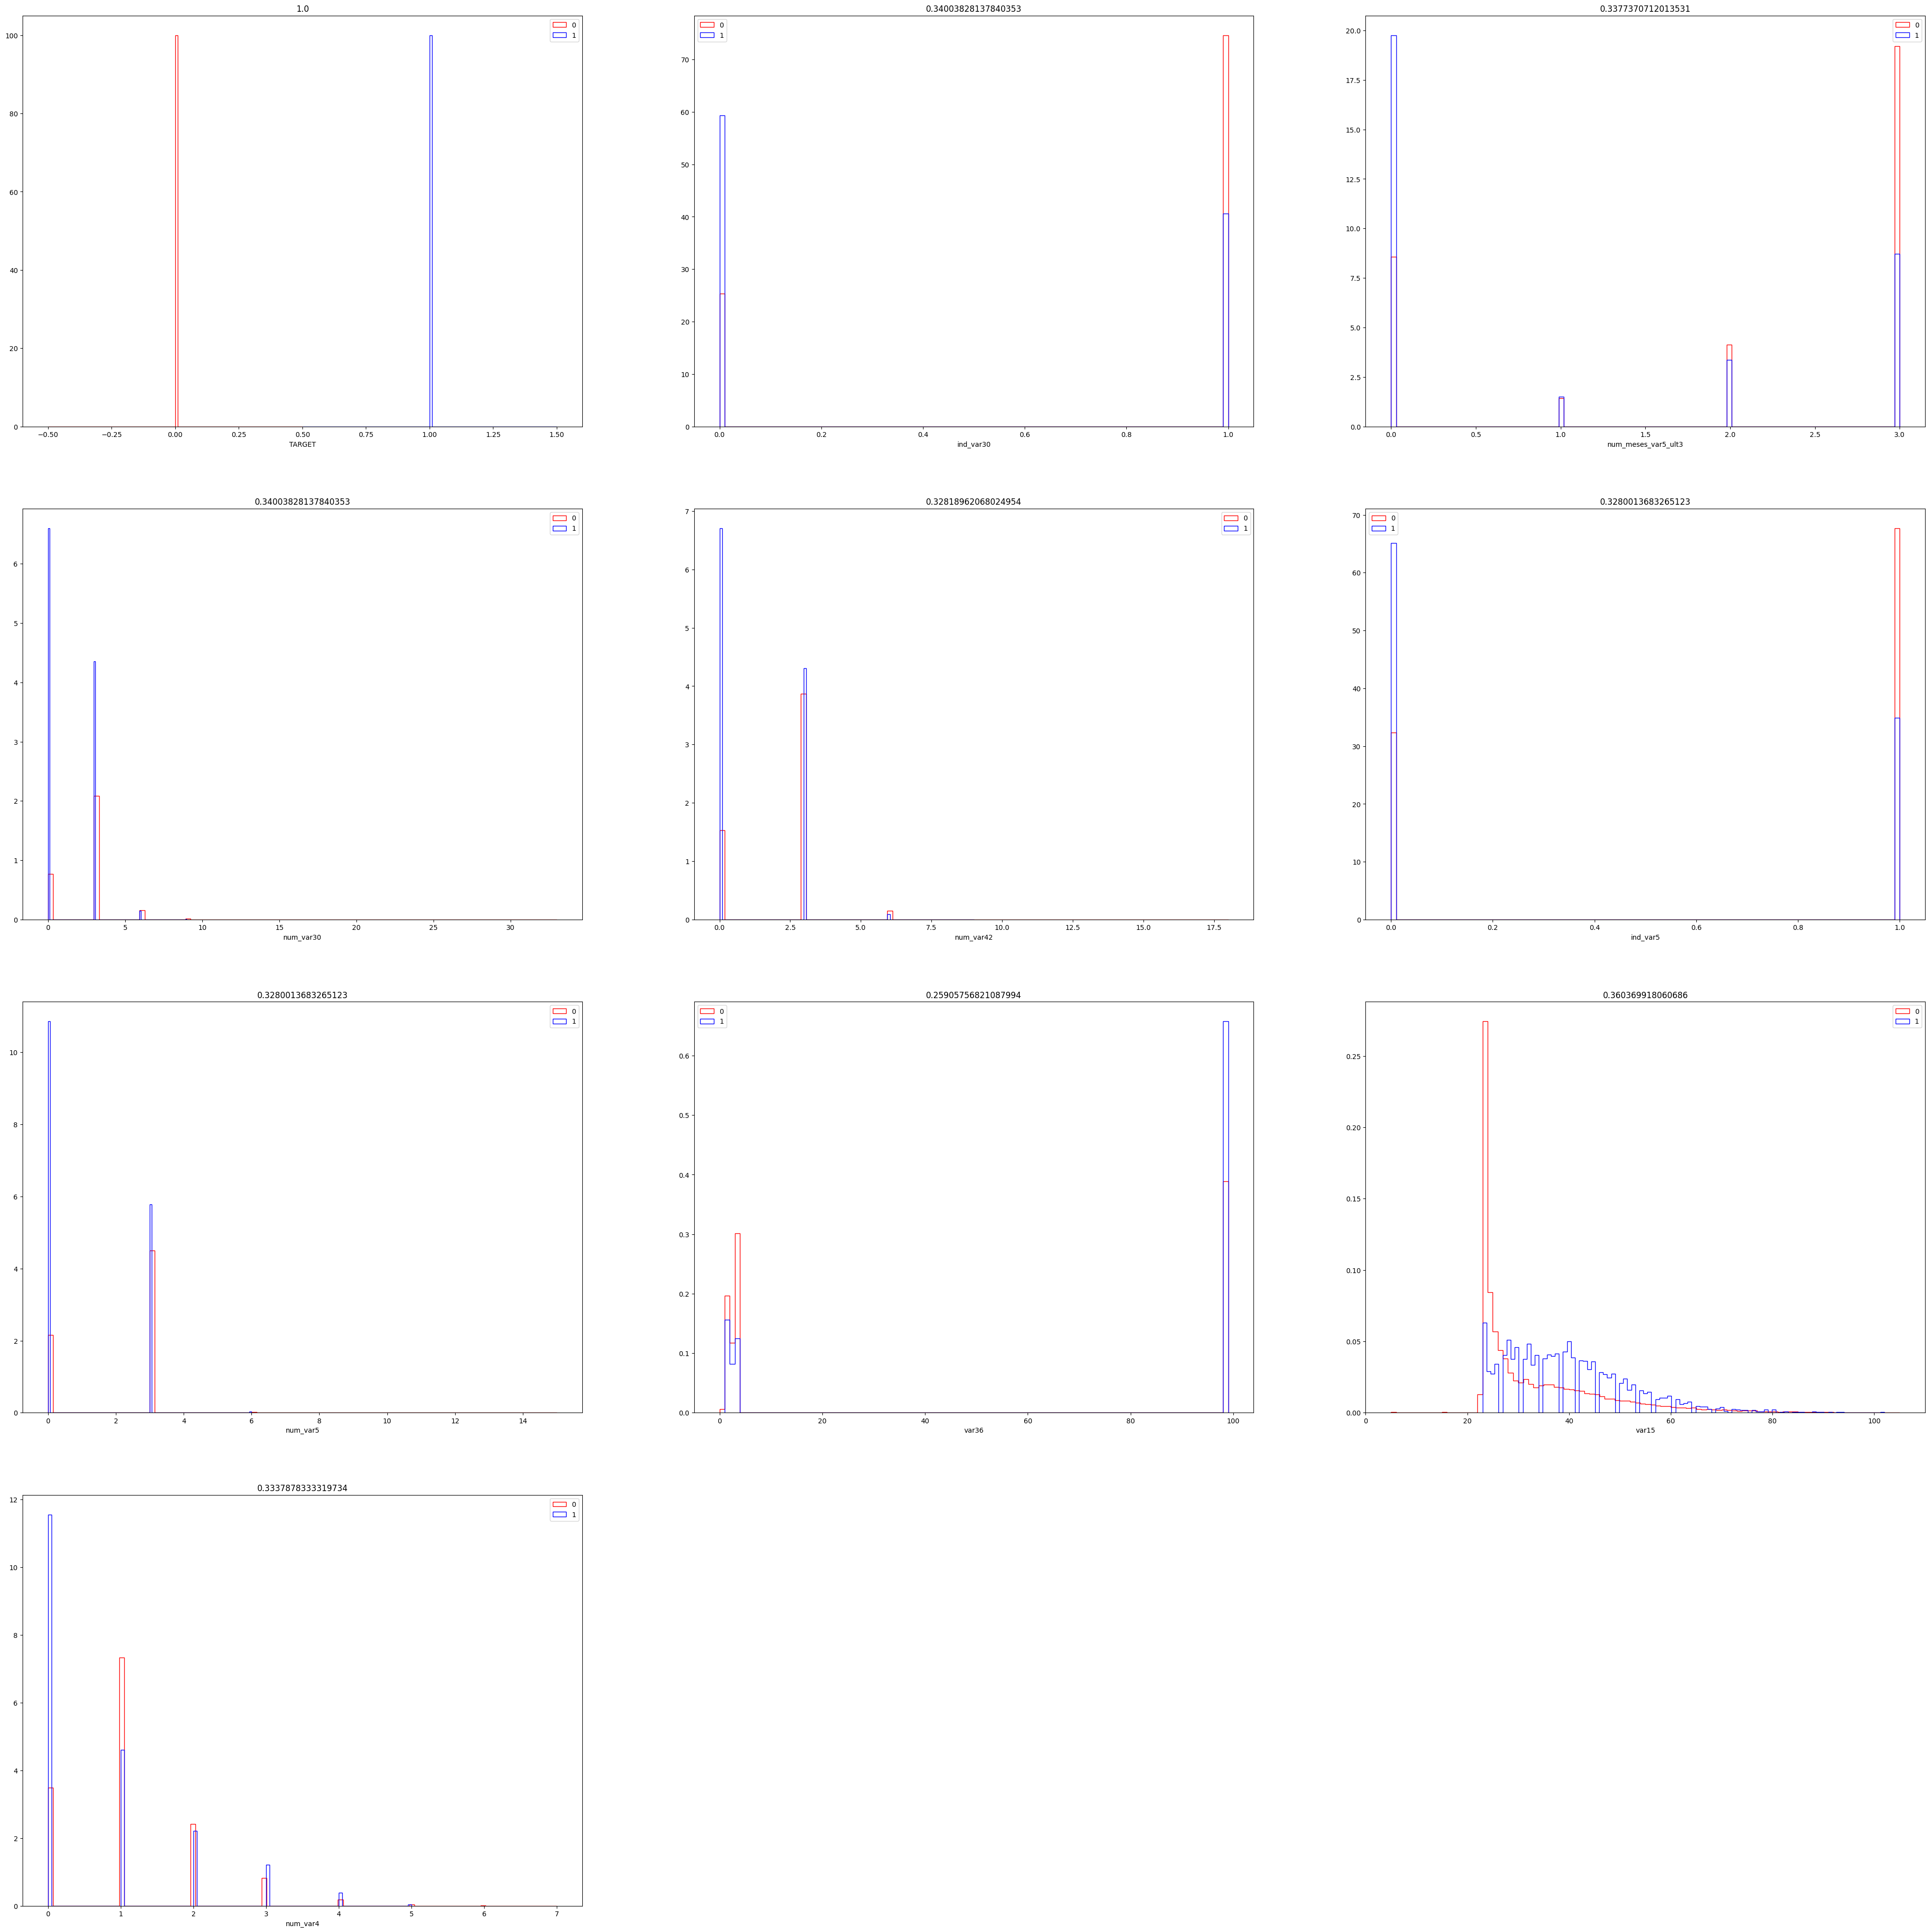

In [63]:
compare_corr_features_binary(d1, top_features=10)

Here I am doing histograms of the ten features with the highest correlation with the target output. Var15 is the only feature that is showing a distribution as there are some of the binary/integer features that I tried to avoid earlier included in the ten most correlated features that are visualized here. There are very few instances of 1 or unsatisfactory in the target column (only about 3000 out of 76000), so these are probably the features where there are the most instances of answers that lead to a 1 or unsatisfactory. 

**Notes on what to do later**

Imbalance== use a weight factor and plac more weight on 1 so it appears the same and is as important as 0

separate variables out from features that have continous values from those integer classes that have small number of classes. 

check correlation between target and features

find how important the features are to the target, and then create different visualization based on the importance and data type of the feature.

